<a href="https://colab.research.google.com/github/Jundula/Neural-networks/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing or Installing packages**

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
pip install yfinance

In [17]:
import yfinance as yf

In [52]:
aapl = yf.download('AAPL', start = '2004-1-1')

[*********************100%***********************]  1 of 1 completed


In [56]:
aapl.Close[:]

Ticker,AAPL
Date,
2004-01-02 00:00:00+00:00,0.380000
2004-01-05 00:00:00+00:00,0.395893
2004-01-06 00:00:00+00:00,0.394464
2004-01-07 00:00:00+00:00,0.403393
2004-01-08 00:00:00+00:00,0.417143
...,...
2024-11-19 00:00:00+00:00,228.279999
2024-11-20 00:00:00+00:00,229.000000
2024-11-21 00:00:00+00:00,228.520004


In [65]:
aapl.Close[0:1]

Ticker,AAPL
Date,
2004-01-02 00:00:00+00:00,0.38


<Axes: xlabel='Date'>

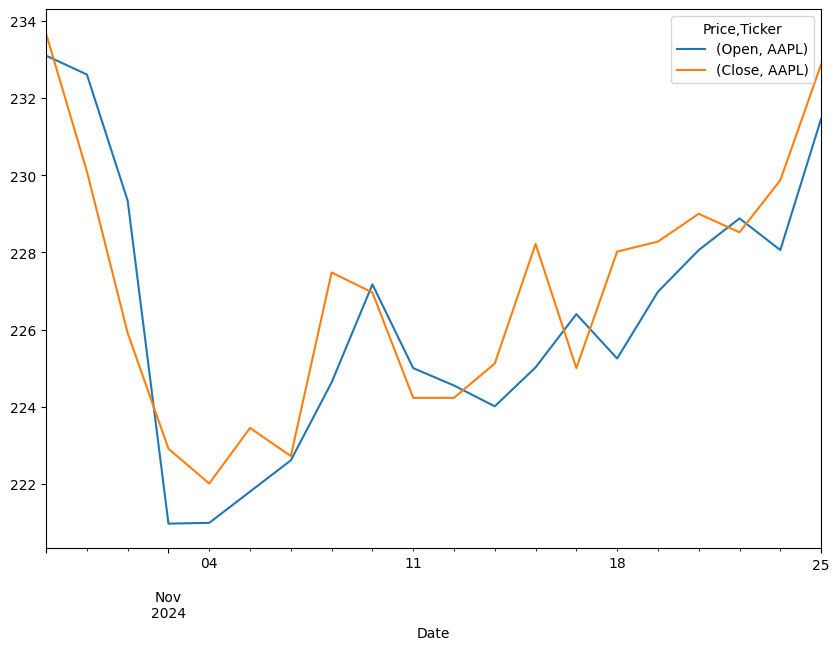

In [8]:
aapl[['Open','Close']].iloc[-20:].plot(figsize=[10,7])


<Axes: xlabel='Date'>

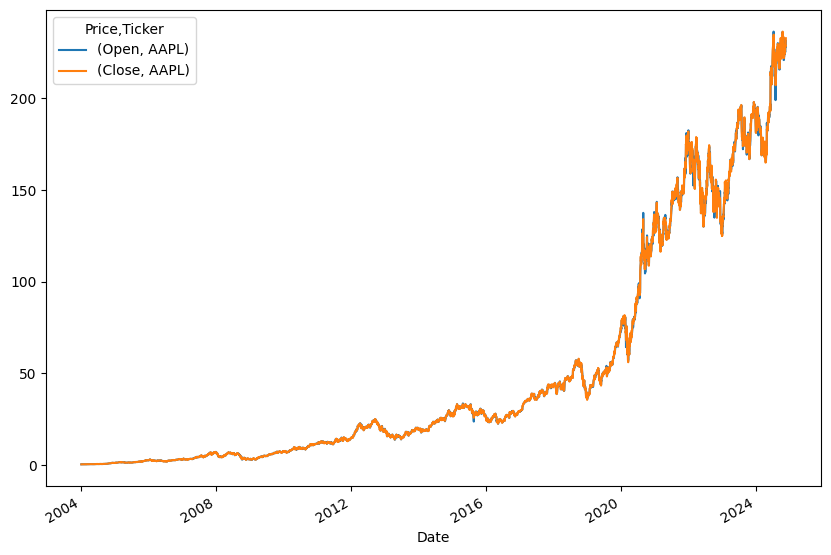

In [9]:
aapl[['Open','Close']].plot(figsize=[10,7])

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
#aapl = yf.download('AAPL', start = '2004-1-1')


inpos = 0
th = 120
pnls = []
dates = []

for i, price in enumerate(aapl.Close.AAPL):
    if inpos == 0 and aapl.Close.AAPL.iloc[i-1]<th and aapl.Close.AAPL.iloc[i]>=th:
        inpos = 1
        entry = price
        print('entry',entry)

    elif inpos == 1 and price > th+5:
        inpos = 0
        pnl = (price - entry)/entry
        print('exit', price, pnl, pnl*100)
        pnls.append(pnl)
        dates.append(aapl.index[i])



entry 124.37000274658203
exit 125.85749816894531 0.011960242739515103 1.1960242739515103
entry 124.4000015258789
exit 127.87999725341797 0.027974241839660425 2.7974241839660423
entry 121.08999633789062
exit 125.56999969482422 0.03699730359585239 3.699730359585239
entry 123.38999938964844
exit 125.9000015258789 0.02034202243817371 2.0342022438173712


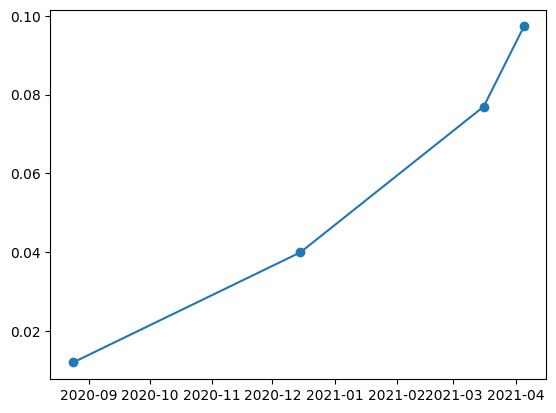

In [97]:
plt.plot(dates,np.cumsum(pnls), '-o')

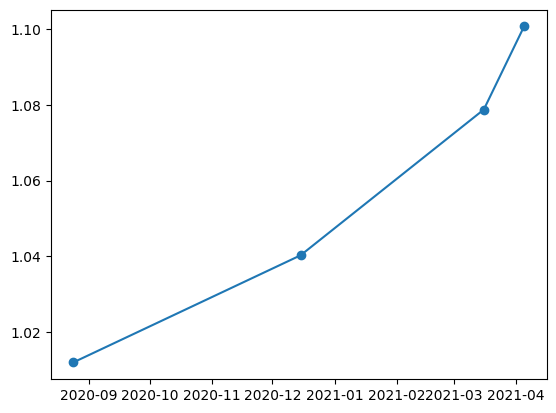

In [98]:
plt.plot(dates,np.cumprod(1+np.array(pnls)), '-o') #

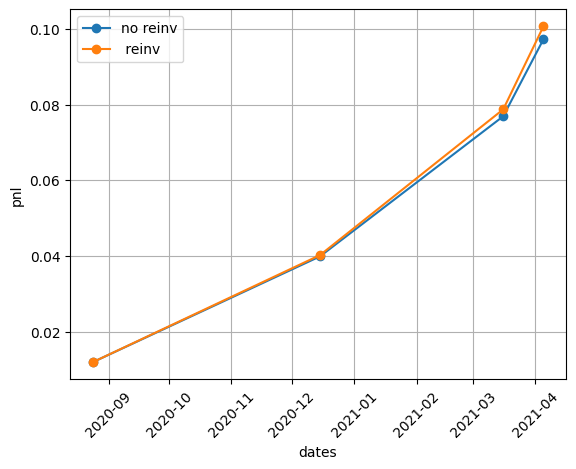

In [105]:
plt.plot(dates,np.cumsum(pnls), '-o', label ='no reinv')
plt.plot(dates,np.cumprod(1+np.array(pnls))-1, '-o', label =' reinv') #

plt.xticks(rotation=45)
plt.grid()
plt.xlabel('dates')
plt.ylabel('pnl')
plt.legend()